In [312]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
%matplotlib inline


In [13]:
#df = pd.read_csv('data/cov_Data.txt', sep = '\t')

## Load and transform public data

In [14]:
#df_tests = pd.read_csv('https://data.egov.bg/resource/download/0ce4e9c3-5dfc-46e2-b4ab-42d840caab92/csv')
#df_overall = pd.read_csv('https://data.egov.bg/resource/download/e59f95dd-afde-43af-83c8-ea2916badd19/csv')
df_tests = pd.read_csv('data/Разпределение по видове тестове.csv')
df_overall = pd.read_csv('data/Обща статистика за разпространението.csv')

In [15]:
#transform test data
df_date = df_tests.loc[:, ['Дата',
        'PCR тестове за денонощие','Установени случаи за денонощие чрез PCR',
       'Антигени тестове за денонощие', 'Установени случаи за денонощие чрез антиген',
       'Общо тестове за денонощие', 'Установени случаи за денонощие']]
df_date.rename(columns = {'Дата' : 'date',
        'PCR тестове за денонощие': 'num_PCR','Установени случаи за денонощие чрез PCR': 'pos_PCR',
       'Антигени тестове за денонощие': 'num_AG', 'Установени случаи за денонощие чрез антиген': 'pos_AG',
       'Общо тестове за денонощие': 'num_tests', 'Установени случаи за денонощие': 'pos_tests'}, inplace = True)
df_date['date'] = pd.to_datetime(df_date['date'])
df_date.set_index('date', inplace = True)

#transform overall data
df_overall.rename(columns = {'Дата' : 'date', 'Направени тестове': 'tests_done', 'Тестове за денонощие': 'tests_today',
       'Потвърдени случаи': 'all_cases', 'Активни случаи': 'active_cases', 'Нови случаи за денонощие': 'new_cases',
       'Хоспитализирани': 'all_hospitalized', 'Новохоспитализирани': 'new_hospitalized', 'В интензивно отделение': 'icu',
       'Излекувани': 'healed', 'Излекувани за денонощие': 'healed_today', 'Починали': 'all_deaths',
       'Починали за денонощие': 'deaths_today'}, inplace = True)

df_overall['date'] = pd.to_datetime(df_overall['date'])
df_overall.set_index('date', inplace = True)

df_date = df_overall.join(df_date, how = 'left')

In [16]:
#df_date = pd.concat([df, df['date'].str.split('.',  expand = True)], axis = 1)
#df_date[2] = df_date[2].apply(lambda x: x if x == 2021 else 2021)
#df_date['date'] = df_date[2].astype(str) + '-' +  df_date[1].astype(str) + '-' +  df_date[0].astype(str)
#df_date['date'] = pd.to_datetime(df_date['date'])
#df_date.drop(columns = [0,1,2], inplace = True)
#df_date.set_index('date', inplace = True)
#df_date.sort_values('date', inplace = True)
#df_date.to_csv('tests.csv')
df_date['perc_PCR'] = round(df_date['pos_PCR']/df_date['num_PCR']*100,1)
df_date['perc_AG'] = round(df_date['pos_AG']/df_date['num_AG']*100,1)
df_date['perc_tests'] = round(df_date['pos_tests']/df_date['num_tests']*100,1)
df_date['num_PCR_roll7'] = df_date['num_PCR'].rolling(7).mean()
df_date['pos_PCR_roll7'] = df_date['pos_PCR'].rolling(7).mean()
df_date['perc_PCR_roll7'] = round(df_date['pos_PCR_roll7']/df_date['num_PCR_roll7']*100,1)
df_date['num_AG_roll7'] = df_date['num_AG'].rolling(7).mean()
df_date['pos_AG_roll7'] = df_date['pos_AG'].rolling(7).mean()
df_date['perc_AG_roll7'] = round(df_date['pos_AG_roll7']/df_date['num_AG_roll7']*100,1)
df_date['num_tests_roll7'] = df_date['num_tests'].rolling(7).mean()
df_date['pos_tests_roll7'] = df_date['pos_tests'].rolling(7).mean()
df_date['perc_tests_roll7'] = round(df_date['pos_tests_roll7']/df_date['num_tests_roll7']*100,1)
df_date['deaths_roll7'] = df_date['deaths_today'].rolling(7).mean()
df_date['new_cases_roll7'] = df_date['new_cases'].rolling(7).mean()
df_date['icu_roll7'] = df_date['icu'].rolling(7).mean()
df_date['all_hospitalized_roll7'] = df_date['all_hospitalized'].rolling(7).mean()
df_date['new_hospitalized_roll7'] = df_date['new_hospitalized'].rolling(7).mean()
df_date['healed_today_roll7'] = df_date['healed_today'].rolling(7).mean()
#df_covid = get_world_data()
#df_date = df_date.join(df_covid.loc[df_covid['Country/Region'] == 'Bulgaria', :].set_index('Date'))
df_date

,tests_done,tests_today,all_cases,active_cases,new_cases,all_hospitalized,new_hospitalized,icu,healed,healed_today,...,perc_AG_roll7,num_tests_roll7,pos_tests_roll7,perc_tests_roll7,deaths_roll7,new_cases_roll7,icu_roll7,all_hospitalized_roll7,new_hospitalized_roll7,healed_today_roll7
date,,,,,,,,,,,,,,,,,,,,,
2020-06-06,89902,2012,2668,980,41,147,12,12,1528,138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-07,90329,1252,2711,1006,43,155,14,12,1545,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-08,90329,427,2727,1019,16,158,5,12,1548,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-09,91735,1406,2810,1059,83,152,23,15,1587,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-10,93512,1777,2889,1099,79,161,25,13,1623,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-24,5265709,25323,568073,78518,3354,6792,349,602,466522,310,...,10.0,26176.000000,4064.857143,15.5,114.571429,4064.857143,565.857143,6469.714286,708.285714,1309.428571
2021-10-25,5276260,10554,569443,79312,1370,6912,299,600,467058,536,...,9.8,26871.857143,4117.714286,15.3,114.142857,4117.714286,578.428571,6589.428571,727.142857,1314.000000
2021-10-26,5327945,51688,575306,82910,5863,7128,1379,608,469080,2022,...,8.7,30430.142857,4244.000000,13.9,118.285714,4244.000000,588.571429,6713.714286,745.428571,1315.857143


In [7]:
df_date.to_csv('data/app_overall.csv')

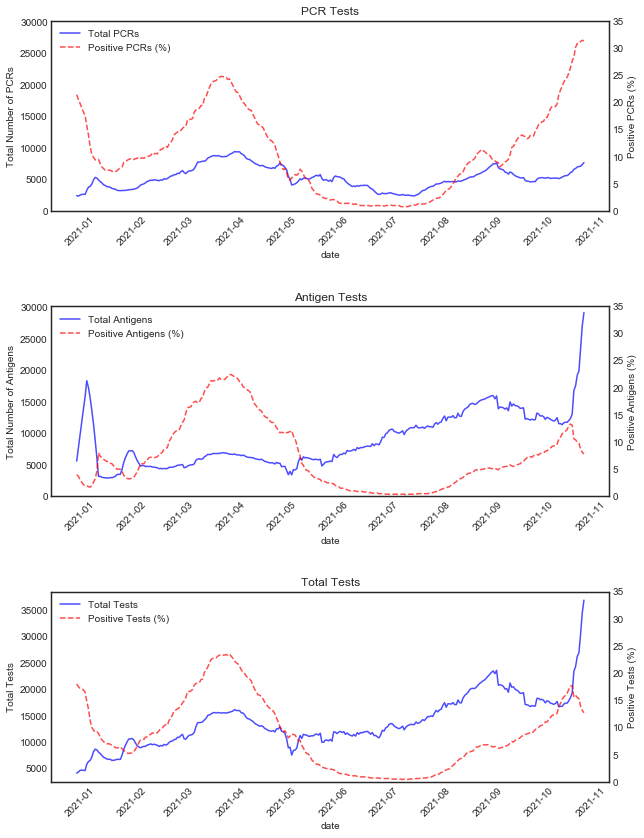

In [8]:
plt.style.use('seaborn-white')
#sns.color_palette("Set2")
#sns.set(font_scale = 1.1)
OPACITY = 0.7
#BCKGCOLOR = 'white'
CLR1 = 'blue'
CLR2 = 'red'
#sns.set(rc={'axes.facecolor':BCKGCOLOR, 'figure.facecolor':BCKGCOLOR})


fig, ax = plt.subplots(3,1, figsize = (10, 14))
#fig.patch.set_alpha(0.3)

ax2 = []
ax[0] = sns.lineplot(data =  df_date['num_PCR_roll7'], color = CLR1,  label = 'Total PCRs', ax = ax[0], legend = False, alpha = OPACITY)
ax2.append(ax[0].twinx())
sns.lineplot(data = df_date['perc_PCR_roll7'], color = CLR2, label = 'Positive PCRs (%)',legend = False,  alpha = OPACITY)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('PCR Tests')
ax[0].set_ylabel('Total Number of PCRs')
ax2[0].set_ylabel('Positive PCRs (%)' )
ax2[0].lines[0].set_linestyle("--")
ax[0].set(ylim=(0, df_date['num_AG_roll7'].max()+1000))
ax2[0].set(ylim=(0, 35))
lines_1, labels_1 = ax[0].get_legend_handles_labels()
lines_2, labels_2 = ax2[0].get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2


ax[0].legend(lines, labels, loc='upper left')

ax[1] = sns.lineplot(data =  df_date['num_AG_roll7'], color = CLR1,  label = 'Total Antigens', ax = ax[1], legend = False, alpha = OPACITY)
ax2.append(ax[1].twinx())
sns.lineplot(data = df_date['perc_AG_roll7'], color = CLR2, label = 'Positive Antigens (%)', legend = False, alpha = OPACITY)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Antigen Tests')
ax[1].set_ylabel('Total Number of Antigens' )
ax2[1].set_ylabel('Positive Antigens (%)' )
ax2[1].lines[0].set_linestyle("--")
ax[1].set(ylim=(0, df_date['num_AG_roll7'].max()+1000))
ax2[1].set(ylim=(0, 35))
lines_1, labels_1 = ax[1].get_legend_handles_labels()
lines_2, labels_2 = ax2[1].get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax[1].legend(lines, labels, loc='upper left')

ax[2] = sns.lineplot(data =  df_date['num_tests_roll7'], color = CLR1,  label = 'Total Tests', ax = ax[2], legend = False, alpha = OPACITY)
ax2.append(ax[2].twinx())
sns.lineplot(data = df_date['perc_tests_roll7'], color = CLR2, label = 'Positive Tests (%)', legend = False, alpha = OPACITY)
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('Total Tests')
ax[2].set_ylabel('Total Tests' )
ax2[2].set_ylabel('Positive Tests (%)')
ax2[2].lines[0].set_linestyle("--")
ax2[2].set(ylim=(0, 35))
lines_1, labels_1 = ax[2].get_legend_handles_labels()
lines_2, labels_2 = ax2[2].get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax[2].legend(lines, labels, loc=0)

#for i, a in enumerate(ax):
    #a.grid(False)
    #ax2[i].grid(False)


plt.subplots_adjust(hspace=0.5)
plt.show()

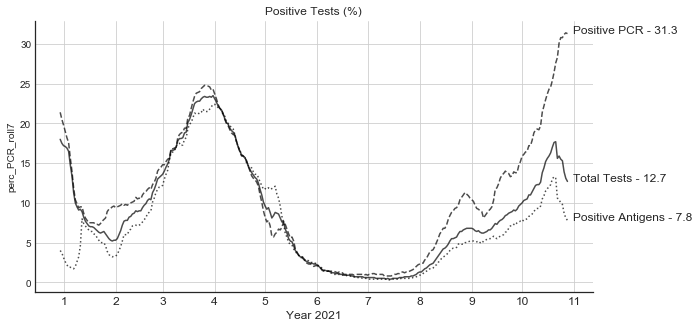

In [11]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize = (10, 5))
ax = sns.lineplot(data =  df_date, x= df_date.index, y = 'perc_PCR_roll7', color = 'black',  label = 'Positive PCR (%)', legend = False, alpha = OPACITY)
sns.lineplot(data =  df_date, x= df_date.index, y = 'perc_AG_roll7', color = 'black',  label = 'Positive Antigens (%)', legend = False, alpha = OPACITY)
sns.lineplot(data =  df_date, x= df_date.index, y = 'perc_tests_roll7', color = 'black',  label = 'Total Tests (%)', legend = False, alpha = OPACITY)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.tick_params(axis='x', rotation=45)
ax.set_title('Positive Tests (%)')
ax.set_xlabel('Year 2021' , size = 12 )
ax.set_xticklabels(set(df_date.index.month), size = 12 )
ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle(":")
ax.grid(True)
ax.text(df_date.index.max() + timedelta(days = 3), df_date['perc_PCR_roll7'].tail(1), 'Positive PCR - ' + str(df_date['perc_PCR_roll7'].tail(1)[0]), size = 12 )
ax.text(df_date.index.max() + timedelta(days = 3), df_date['perc_AG_roll7'].tail(1), 'Positive Antigens - ' + str(df_date['perc_AG_roll7'].tail(1)[0]), size = 12 )
ax.text(df_date.index.max() + timedelta(days = 3), df_date['perc_tests_roll7'].tail(1), 'Total Tests - ' + str(df_date['perc_tests_roll7'].tail(1)[0]), size = 12 )
plt.show()

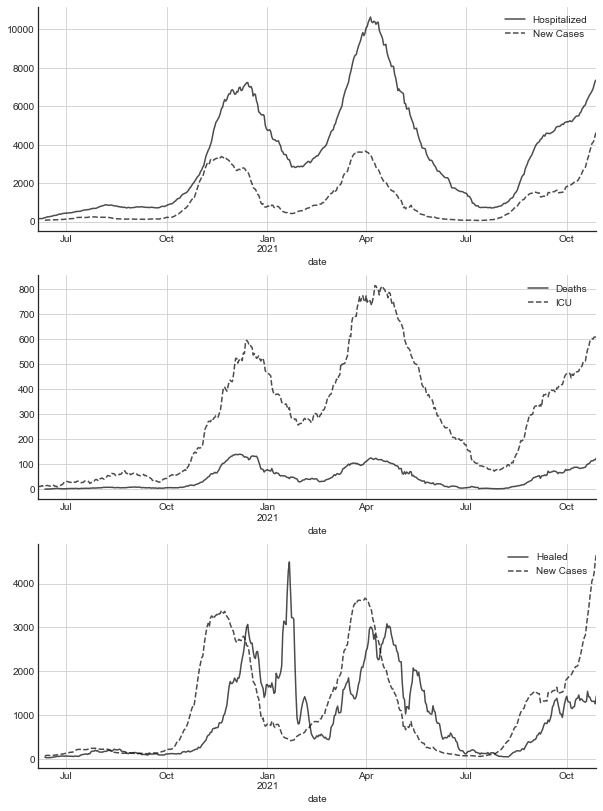

In [10]:
fig, ax = plt.subplots(3,1, figsize = (10,14))

clr1 = 'black'
clr2 = 'black'
OPACITY = 0.7
ax[1] = df_date[['deaths_roll7', 'icu']].plot( color = [clr1, clr2], ax = ax[1], alpha = OPACITY)
ax[1].lines[1].set_linestyle("--")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].grid(True)
ax[1].legend(labels = ['Deaths', 'ICU'])

ax[0] = df_date[['all_hospitalized', 'new_cases_roll7']].plot( color = [clr1, clr2], ax = ax[0], alpha = OPACITY)
ax[0].lines[1].set_linestyle("--")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].grid(True)
ax[0].legend(labels = ['Hospitalized', 'New Cases'])

ax[2] = df_date[['healed_today_roll7', 'new_cases_roll7']].plot( color = [clr1, clr2], ax = ax[2], alpha = OPACITY)
ax[2].lines[1].set_linestyle("--")
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].grid(True)
ax[2].legend(labels = ['Healed', 'New Cases'])



## Deaths by sex and age group

In [13]:
#df_deaths_agesex = pd.read_csv('https://data.egov.bg/resource/download/18851aca-4c9d-410d-8211-0b725a70bcfd/csv')
df_deaths_agesex = pd.read_csv('data/Починали по пол и възрастови групи.csv')
df_deaths_agesex.rename(columns = {'Дата' : 'date', 'Пол': 'sex', 'Възрастова група': 'age_group', 'Брой починали': 'deaths'}, inplace = True)
df_deaths_agesex['date'] = pd.to_datetime(df_deaths_agesex['date'])
df_deaths_agesex.set_index('date', inplace = True)
df_deaths_agesex.replace('-', np.nan,inplace = True)
sex = {'мъж' : 'male', 'жена' : 'female'}
df_deaths_agesex['sex'] = df_deaths_agesex['sex'].map(sex)


In [37]:

df_deaths_agesex_group = df_deaths_agesex.loc['2020-09-01' : '2020-12-01', :].groupby(['sex', 'age_group']).sum()
df_deaths_agesex_group.reset_index(inplace = True)

fig = go.Figure()
px.bar(df_deaths_agesex_group, x = 'age_group', y = 'deaths', color = 'sex', barmode="group",opacity = 0.6, color_discrete_map={
        'female': 'red',
        'male': 'blue'
    })


In [14]:
df_deaths_bysex = df_deaths_agesex.groupby(['date', 'sex']).sum()
df_deaths_bysex = df_deaths_bysex.unstack()
df_deaths_bysex = df_deaths_bysex.droplevel(level = 0, axis = 1)
df_deaths_bysex.rename(columns = {'male': 'deaths_male', 'female': 'deaths_female'}, inplace = True)
df_deaths_bysex.replace(np.nan, 0, inplace = True)
df_deaths_bysex['deaths_male_roll7'] = df_deaths_bysex['deaths_male'].rolling(7).mean()
df_deaths_bysex['deaths_female_roll7'] = df_deaths_bysex['deaths_female'].rolling(7).mean()

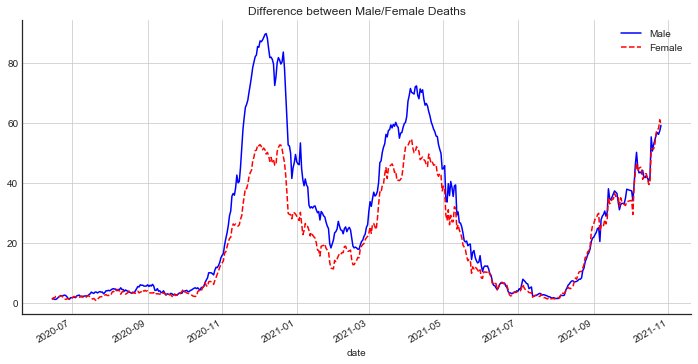

In [15]:

clr1 = 'blue'
clr2 = 'red'

ax = df_deaths_bysex[['deaths_male_roll7', 'deaths_female_roll7']].plot( color = [clr1, clr2], figsize = (12,6))
ax.lines[1].set_linestyle("--")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(True)
ax.set_title('Difference between Male/Female Deaths')
ax.legend(labels = ['Male', 'Female'])

In [12]:
df_deaths_bysex.head()

NameError: name 'df_deaths_bysex' is not defined

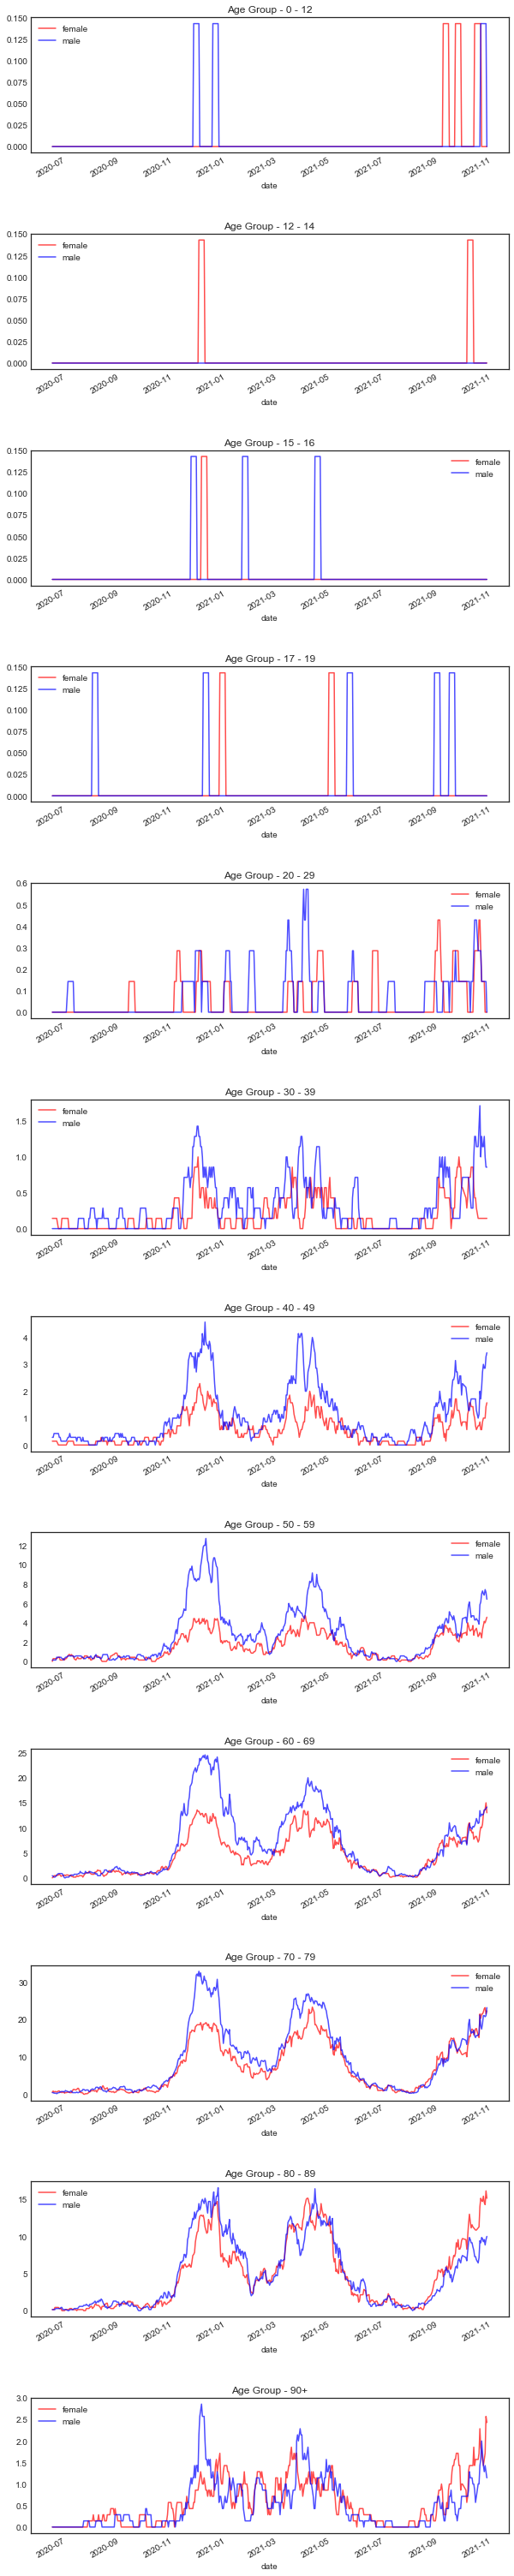

In [420]:
fig, ax = plt.subplots(12,1, figsize = (10, 60))
plt.subplots_adjust(hspace=0.6)
for i, col in enumerate(df_deaths_byagesex['deaths']['male']):
    
    df_deaths_byagesex['deaths']['female'][col].rolling(7).mean().plot(ax = ax[i], label = 'female', color = 'red', alpha = 0.7)
    df_deaths_byagesex['deaths']['male'][col].rolling(7).mean().plot(ax = ax[i], label = 'male', color = 'blue', alpha = 0.7)
    ax[i].legend()
    ax[i].set_title('Age Group - ' + str(col))
    
plt.savefig('data/pic.jpg')

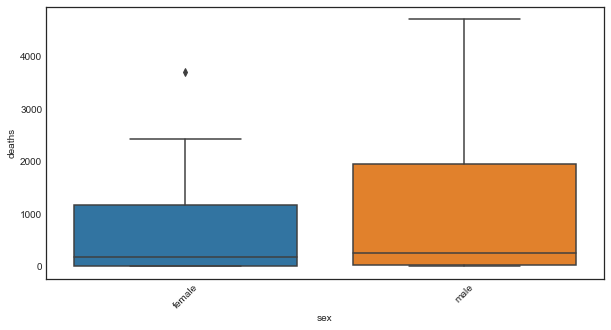

In [384]:
fig = plt.figure(figsize = (10,5))
ax = sns.boxplot(data = df_deaths_agesex_group[['sex', 'deaths']],  x = 'sex', y = 'deaths')
ax.tick_params(axis='x', rotation=45)

In [423]:
df_deaths_agesex_group.sum()

sex          femalefemalefemalefemalefemalefemalefemalefema...
age_group    12 - 1420 - 2930 - 3940 - 4950 - 5960 - 6970 -...
deaths                                                    3559
dtype: object

## New cases by age group

In [105]:
#df_agegroup = pd.read_csv('https://data.egov.bg/resource/download/8f62cfcf-a979-46d4-8317-4e1ab9cbd6a8/csv')
df_agegroup = pd.read_csv('data/Разпределение по дата и по възрастови групи.csv')

df_agegroup.replace('-', 0, inplace = True)
df_agegroup.rename(columns = {'Дата' : 'date'}, inplace = True)
df_agegroup.set_index('date', inplace = True)
df_agegroup = df_agegroup.iloc[:, 5:]

In [106]:
df_agegroup = df_agegroup.astype(int)

<Figure size 1080x720 with 0 Axes>

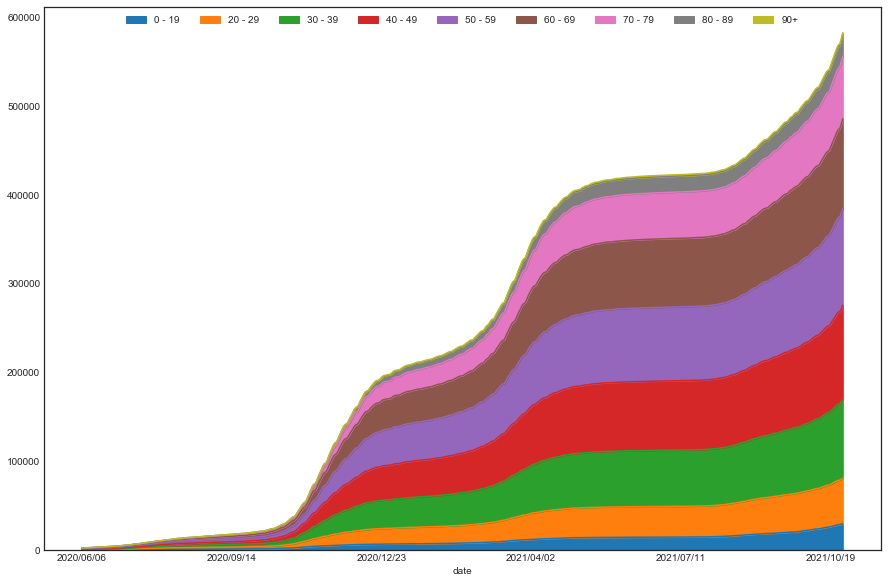

In [115]:
fig = plt.figure(figsize = (15, 10))
#df_agegroup_stack = df_agegroup.divide(df_agegroup.sum(axis=1), axis=0)
ax = df_agegroup.plot(kind = 'area', figsize = (15, 10), stacked=True)
ax.legend(loc = 'upper center', ncol=len(df_agegroup_stack.columns))

In [11]:
import plotly.express as px
import plotly.graph_objects as go
OPACITY = 0.7

fig = go.Figure()
temp = df_date.loc['2020-12-20' : ]
fig.add_trace(go.Scatter( x=temp.index, y=temp["perc_PCR_roll7"], name = 'Positive PCRs',
                         opacity = OPACITY,  line=dict(color='black')))
fig.add_trace(go.Scatter( x=temp.index, y=temp["perc_AG_roll7"], name = 'Positive Antigens', 
                         opacity = OPACITY,line=dict(color='black', dash='dash')))
fig.add_trace(go.Scatter( x=temp.index, y=temp["perc_tests_roll7"], name = 'Positive Antigens', 
                         opacity = OPACITY,line=dict(color='black', dash='dash')))


# Edit the layout
fig.update_layout(  title='Increasing positive PCR test',
                    xaxis_title='Year 2021',
                    yaxis_title='Positive Rate (%)',
                    plot_bgcolor='white',
                    xaxis=dict(
                                showline=True,
                                showgrid=False,
                                showticklabels=True,
                                linecolor='rgb(0, 0, 0)',
                                linewidth=1,
                                ticks='outside',
                                tickfont=dict(
                                    family='Calibri',
                                    size=14,
                                    color='rgb(82, 82, 82)'
                                )),
                    yaxis=dict(
                            showgrid=False,
                            zeroline=False,
                            linecolor='rgb(0, 0, 0)',
                            showline=True,
                            showticklabels=True,
                    ))

annotations = []
annotations.append(dict(xref='paper', x=1.01, y=temp["perc_PCR_roll7"].tail(1)[0],
                                  xanchor='left', yanchor='middle',
                                  text='PCR - {}%'.format(temp["perc_PCR_roll7"].tail(1)[0]),
                                  font=dict(family='Calibri',
                                            size=14),
                                  showarrow=False))

annotations.append(dict(xref='paper', x=1.01, y=temp["perc_AG_roll7"].tail(1)[0],
                                  xanchor='left', yanchor='middle',
                                  text='Antigen - {}%'.format(temp["perc_AG_roll7"].tail(1)[0]),
                                  font=dict(family='Calibri',
                                            size=14),
                                  showarrow=False))

annotations.append(dict(xref='paper', x=1.01, y=temp["perc_tests_roll7"].tail(1)[0],
                                  xanchor='left', yanchor='middle',
                                  text='All Tests - {}%'.format(temp["perc_tests_roll7"].tail(1)[0]),
                                  font=dict(family='Calibri',
                                            size=14),
                                  showarrow=False))

fig.update_layout(annotations = annotations, showlegend = False)

fig.show()

In [313]:
import json
import plotly.express as px
with open('data/provinces.geojson', 'rb') as f:
    regions = json.load(f)

df_areas = pd.read_csv('data/Разпределение по дата и по области.csv')
df_areas.rename(columns = {'Дата' : 'date'}, inplace = True)
df_areas['date'] = pd.to_datetime(df_areas['date'])
df_population = pd.read_csv('data/region_population.csv', sep = '\t')

cols= [k for k in df_areas.columns if '_ALL' in k]
df_areas_all = df_areas.melt(id_vars = 'date', value_vars = cols, value_name = 'all_cases')
df_areas_all['REG'] = df_areas_all['variable'].str[0:3]

cols= [k for k in df_areas.columns if '_ACT' in k]
df_areas_act = df_areas.melt(id_vars = 'date', value_vars = cols, value_name = 'active_cases')
df_areas_act['REG'] = df_areas_act['variable'].str[0:3]

df_areas_full = df_areas_act.merge(df_areas_all, on = ['date', 'REG'])

df_areas_full = df_areas_full.merge(df_population, on= 'REG')

df_areas_full['dt_str'] = df_areas_full['date'].apply(lambda x: x.strftime("%Y-%m-%d"))
df_areas_full.set_index('date', inplace = True)
df_areas_full['active_cases_per_100k'] = round(df_areas_full['active_cases']/(df_areas_full['POPULATION']/100000),0)
df_areas_full.drop(columns = ['variable_x', 'variable_y'], inplace = True)


In [315]:
token = 'pk.eyJ1IjoiaTEyZmx5IiwiYSI6ImNrdGZwejk5aTBhbXoyb211cWswc3pjaHkifQ.j5ysSfwAGc267jYv3PGjlw'
mapbox_style = 'outdoors'

df_areas_map= df_areas_full.loc[df_areas_full.index.max()]

fig  = px.choropleth_mapbox(df_areas_map,
                            geojson= regions,
                            locations='REG',
                            featureidkey="properties.nuts3",
                            color=df_areas_map['active_cases_per_100k'],
                            color_continuous_scale = 'pubugn',
                            range_color=[0,df_areas_map['active_cases_per_100k'].max()],
                            #hover_name = {'dt_str', 'POPULATION', 'active_cases_per_100k'},
                            hover_data = {'dt_str', 'POPULATION', 'active_cases', 'active_cases_per_100k'},
                            zoom=6, 
                            center={'lat':43 , 'lon':25 },
                            opacity=0.6,
                            animation_frame = 'dt_str')

fig.update_layout(mapbox_style=mapbox_style, mapbox_accesstoken=token, legend=dict(y=0.95))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
def get_world_data():
    full_grouped = pd.read_csv('https://github.com/datasets/covid-19/blob/main/data/time-series-19-covid-combined.csv?raw=true', index_col = 0)
    temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
    temp = temp.sum().diff().reset_index()
    mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
    temp.loc[mask, 'Confirmed'] = np.nan
    temp.loc[mask, 'Deaths'] = np.nan
    temp.loc[mask, 'Recovered'] = np.nan
    # renaming columns
    temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']
    # merging new values
    full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])
    # filling na with 0
    full_grouped = full_grouped.fillna(0)
    # fixing data types
    cols = ['New cases', 'New deaths', 'New recovered']
    full_grouped[cols] = full_grouped[cols].astype('int')
    # 
    full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)
    
    return full_grouped